In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
from lifelines import *
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('telco.csv')
data_unchanged = data.copy()

data = data.drop("ID",axis=1)

In [3]:
data.head()

,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn
0,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes
1,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes
2,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No
3,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes
4,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No


In [4]:
cat_vars = ["churn",'region', 'marital', 'ed', 'retire', 'gender', 'voice', 'internet', 'forward', 'custcat']

categorical_data = pd.get_dummies(data,
               columns=cat_vars,
               prefix=cat_vars,
               drop_first=True,
               dtype='int')

In [5]:
categorical_data.head()

,tenure,age,address,income,churn_Yes,region_Zone 2,region_Zone 3,marital_Unmarried,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,retire_Yes,gender_Male,voice_Yes,internet_Yes,forward_Yes,custcat_E-service,custcat_Plus service,custcat_Total service
0,13,44,9,64,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,11,33,7,136,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1
2,68,52,24,116,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
3,33,33,12,33,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,23,30,9,30,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0


In [6]:
categorical_data.columns

Index(['tenure', 'age', 'address', 'income', 'churn_Yes', 'region_Zone 2',
       'region_Zone 3', 'marital_Unmarried', 'ed_Did not complete high school',
       'ed_High school degree', 'ed_Post-undergraduate degree',
       'ed_Some college', 'retire_Yes', 'gender_Male', 'voice_Yes',
       'internet_Yes', 'forward_Yes', 'custcat_E-service',
       'custcat_Plus service', 'custcat_Total service'],
      dtype='object')

In [7]:
weibull = WeibullFitter()
lognormal = LogNormalFitter()
exponential = ExponentialFitter()
loglogistic = LogLogisticFitter()

<Axes: >

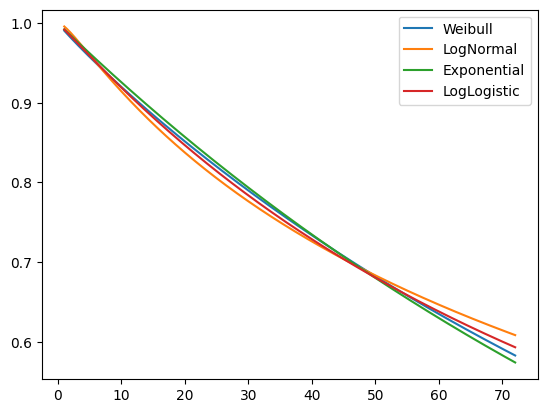

In [8]:
weibull.fit(durations=categorical_data["tenure"], event_observed=categorical_data["churn_Yes"]).plot_survival_function(ci_show=False, label='Weibull')
lognormal.fit(durations=categorical_data["tenure"], event_observed=categorical_data["churn_Yes"]).plot_survival_function(ci_show=False, label='LogNormal')
exponential.fit(durations=categorical_data["tenure"], event_observed=categorical_data["churn_Yes"]).plot_survival_function(ci_show=False, label='Exponential')
loglogistic.fit(durations=categorical_data["tenure"], event_observed=categorical_data["churn_Yes"]).plot_survival_function(ci_show=False, label='LogLogistic')

In [9]:
# Output AIC and BIC for each model
print(f"AIC for Weibull Fitter is {weibull.AIC_}")
print(f"BIC for Weibull Fitter is {weibull.BIC_}")
print(f"AIC for LogNormal Fitter is {lognormal.AIC_}")
print(f"BIC for LogNormal Fitter is {lognormal.BIC_}")
print(f"AIC for Exponential Fitter is {exponential.AIC_}")
print(f"BIC for Exponential Fitter is {exponential.BIC_}")
print(f"AIC for LogLogistic Fitter is {loglogistic.AIC_}")
print(f"BIC for LogLogistic Fitter is {loglogistic.BIC_}")

AIC for Weibull Fitter is 3216.8611706815464
BIC for Weibull Fitter is 3226.676681239511
AIC for LogNormal Fitter is 3209.0351474316735
BIC for LogNormal Fitter is 3218.850657989638
AIC for Exponential Fitter is 3215.9608134637247
BIC for Exponential Fitter is 3220.868568742707
AIC for LogLogistic Fitter is 3214.4154757933375
BIC for LogLogistic Fitter is 3224.230986351302


The LogNormal model has the lowest AIC and BIC results so we will go forward with that.

In [10]:
lognormal.print_summary()

<lifelines.LogNormalFitter:"LogNormal_estimate", fitted with 1000 total observations, 726 right-censored observations>
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1602.52
               hypothesis = mu_ != 0, sigma_ != 1

---
        coef  se(coef)  coef lower 95%  coef upper 95%
mu_     4.77      0.10            4.57            4.98
sigma_  1.81      0.09            1.64            1.97

        cmp to     z      p  -log2(p)
mu_       0.00 46.06 <0.005       inf
sigma_    1.00  9.37 <0.005     66.94
---
AIC = 3209.04

In [11]:
categorical_data.head()

,tenure,age,address,income,churn_Yes,region_Zone 2,region_Zone 3,marital_Unmarried,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,retire_Yes,gender_Male,voice_Yes,internet_Yes,forward_Yes,custcat_E-service,custcat_Plus service,custcat_Total service
0,13,44,9,64,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,11,33,7,136,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1
2,68,52,24,116,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
3,33,33,12,33,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,23,30,9,30,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0


In [12]:
print(categorical_data['churn_Yes'].value_counts())

churn_Yes
0    726
1    274
Name: count, dtype: int64


In [13]:
# Verify and clean the DataFrame structure
categorical_data['tenure'] = pd.to_numeric(categorical_data['tenure'], errors='coerce')
categorical_data['churn_Yes'] = categorical_data['churn_Yes'].astype(int)

# Check for any null values that might cause issues
print(categorical_data.isnull().sum())

# Reset index to ensure it's unique and sorted
categorical_data.reset_index(drop=True, inplace=True)

tenure                             0
age                                0
address                            0
income                             0
churn_Yes                          0
region_Zone 2                      0
region_Zone 3                      0
marital_Unmarried                  0
ed_Did not complete high school    0
ed_High school degree              0
ed_Post-undergraduate degree       0
ed_Some college                    0
retire_Yes                         0
gender_Male                        0
voice_Yes                          0
internet_Yes                       0
forward_Yes                        0
custcat_E-service                  0
custcat_Plus service               0
custcat_Total service              0
dtype: int64


In [15]:
lognormal_aft = LogNormalAFTFitter()
lognormal_aft.fit(categorical_data, duration_col='tenure', event_col='churn_Yes')

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>

In [16]:
lognormal_aft.print_summary()  

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn_Yes'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1457.01
         time fit was run = 2024-05-01 17:02:57 UTC

---
                                        coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param  covariate                                                                                                                        
mu_    address                          0.04      1.04      0.01            0.03            0.06                1.03                1.06
       age                              0.03      1.03      0.01            0.02            0.05                1.02                1.05
       custcat_E-service                1.07      2.90      0.17            0.73            1.40                2.08                4.06
       custcat_Plus service             0.92      2.52      0.22            0.50            1.35                1.65                3.85
       custcat_Total service            1.20      3.32      0.25            0.71            1.69                2.03                5.42
       ed_Did not complete high school  0.37      1.45      0.20           -0.02            0.77                0.98                2.16
       ed_High school degree            0.32      1.37      0.16           -0.00            0.64                1.00                1.89
       ed_Post-undergraduate degree    -0.03      0.97      0.22           -0.47            0.40                0.62                1.50
       ed_Some college                  0.27      1.31      0.17           -0.05            0.60                0.95                1.82
       forward_Yes                     -0.20      0.82      0.18           -0.55            0.15                0.58                1.17
       gender_Male                      0.05      1.05      0.11           -0.17            0.28                0.84                1.32
       income                           0.00      1.00      0.00           -0.00            0.00                1.00                1.00
       internet_Yes                    -0.77      0.46      0.14           -1.05           -0.49                0.35                0.61
       marital_Unmarried               -0.46      0.63      0.12           -0.68           -0.23                0.51                0.80
       region_Zone 2                   -0.10      0.91      0.14           -0.38            0.18                0.69                1.20
       region_Zone 3                    0.05      1.05      0.14           -0.23            0.33                0.80                1.38
       retire_Yes                       0.02      1.02      0.44           -0.85            0.89                0.43                2.44
       voice_Yes                       -0.43      0.65      0.17           -0.76           -0.10                0.47                0.90
       Intercept                        2.36     10.61      0.29            1.79            2.94                5.98               18.84
sigma_ Intercept                        0.28      1.32      0.05            0.19            0.37                1.20                1.44

                                        cmp to     z      p  -log2(p)
param  covariate                                                     
mu_    address                            0.00  4.78 <0.005     19.11
       age                                0.00  4.50 <0.005     17.19
       custcat_E-service                  0.00  6.25 <0.005     31.21
       custcat_Plus service               0.00  4.29 <0.005     15.75
       custcat_Total service              0.00  4.79 <0.005     19.16
       ed_Did not complete high school    0.00  1.85   0.06      3.97
       ed_High school degree              0.00  1.94   0.05      4.24
       ed_Post-und

Removing columns with higher p values

In [17]:
categorical_data = categorical_data.drop(columns = [ 'ed_Did not complete high school', 'ed_High school degree', 'ed_Post-undergraduate degree', 'ed_Some college', 'forward_Yes', 'income', 'region_Zone 2', 'region_Zone 3', 
                         'gender_Male', 'retire_Yes' ])

categorical_data.head()

,tenure,age,address,churn_Yes,marital_Unmarried,voice_Yes,internet_Yes,custcat_E-service,custcat_Plus service,custcat_Total service
0,13,44,9,1,0,0,0,0,0,0
1,11,33,7,1,0,1,0,0,0,1
2,68,52,24,0,0,0,0,0,1,0
3,33,33,12,1,1,0,0,0,0,0
4,23,30,9,0,0,0,0,0,1,0


In [18]:
lognormal_aft_cleaned = LogNormalAFTFitter()
lognormal_aft_cleaned.fit(categorical_data, duration_col='tenure', event_col='churn_Yes')

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>

In [19]:
lognormal_aft_cleaned.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn_Yes'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.10
         time fit was run = 2024-05-01 17:10:37 UTC

---
                              coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param  covariate                                                                                                              
mu_    address                0.04      1.04      0.01            0.03            0.06                1.03                1.06
       age                    0.04      1.04      0.01            0.02            0.05                1.02                1.05
       custcat_E-service      1.03      2.79      0.17            0.69            1.36                2.00                3.89
       custcat_Plus service   0.82      2.28      0.17            0.49            1.15                1.63                3.17
       custcat_Total service  1.01      2.75      0.21            0.60            1.42                1.83                4.15
       internet_Yes          -0.84      0.43      0.14           -1.11           -0.57                0.33                0.57
       marital_Unmarried     -0.45      0.64      0.11           -0.67           -0.22                0.51                0.80
       voice_Yes             -0.46      0.63      0.17           -0.79           -0.14                0.45                0.87
       Intercept              2.53     12.62      0.24            2.06            3.01                7.84               20.30
sigma_ Intercept              0.28      1.33      0.05            0.19            0.37                1.21                1.45

                              cmp to     z      p  -log2(p)
param  covariate                                           
mu_    address                  0.00  4.84 <0.005     19.56
       age                      0.00  5.75 <0.005     26.78
       custcat_E-service        0.00  6.07 <0.005     29.53
       custcat_Plus service     0.00  4.85 <0.005     19.66
       custcat_Total service    0.00  4.83 <0.005     19.52
       internet_Yes             0.00 -6.08 <0.005     29.63
       marital_Unmarried        0.00 -3.91 <0.005     13.39
       voice_Yes                0.00 -2.78   0.01      7.52
       Intercept                0.00 10.45 <0.005     82.47
sigma_ Intercept                0.00  6.15 <0.005     30.27
---
Concordance = 0.78
AIC = 2944.20
log-likelihood ratio test = 280.83 on 8 df
-log2(p) of ll-ratio test = 183.73

**Age**

Coefficient: 0.04
Interpretation: With each passing year, customers are 1.04 times more inclined to churn.
Explanation: Advancing age might prompt customers to explore alternative
providers or services, driven by evolving needs, preferences, or technological advancements.

**E-service**

Coefficient: 1.03
Interpretation: E-service customers exhibit a 2.79 times higher likelihood of churning compared to the reference group.
Explanation: E-service clientele likely engage less with the service overall, elevating the risk of churn.

**Plus Service**

Coefficient: 0.82
Interpretation: Plus service patrons are 2.28 times more prone to churn compared to the reference group.
Explanation: Plus service users might possess heightened expectations and be more sensitive to price fluctuations or service disruptions, hence raising their churn propensity.

**Total Service**

Coefficient: 1.01
Interpretation: Total service subscribers are 2.75 times more predisposed to churn compared to the reference group.
Explanation: Total service consumers might have a broader array of alternatives, making them more inclined to switch to competitors.

**Internet Access**

Coefficient: -0.84
Interpretation: Customers with internet connectivity are 0.43 times less likely to churn than those without it.
Explanation: Internet access enriches the service experience and fosters greater customer engagement, thereby mitigating churn risk.


**Marital Status**

Coefficient: -0.45
Interpretation: Married customers exhibit a 0.64 times lower likelihood of churning compared to singles.
Explanation: Married couples' shared responsibilities and decision-making dynamics may deter impulsive actions like switching providers.

**Voice Service**

Coefficient: -0.46
Interpretation: Customers with voice service are 0.63 times less likely to churn than those without it.
Explanation: Voice service offers a more personalized and interactive experience, nurturing customer loyalty and reducing churn.

**Intercept**

Coefficient: 2.53
Interpretation: This denotes the baseline log hazard of churn for the reference group, with all covariates assumed at zero.
Explanation: The intercept provides a benchmark for comprehending the effects of other variables.

**Standard Deviation (Sigma)**

Coefficient: 0.28
Interpretation: This signifies the standard deviation of the log hazard, indicating churn rate variability among customers.
Explanation: A higher sigma value suggests greater diversity in churn behavior across the customer base.

Segments with lower coefficients (indicating lower churn propensity) are the **customers with internet access, married customers, and those with voice service,** are to be considered more valuable. These segments will probably less effort to retain and could potentially yield higher long-term profits.

On the other hand, custcat_E-service, custcat_Plus service, and custcat_Total service have higher hazard rate and customers in these categories are at a higher risk of churning. These segments might require specific retention strategies to reduce churn, such as targeted communications, improved service offerings, or personalized incentives to encourage loyalty.

***CLV***

In [43]:
monthly_m = 1500 
predictions = lognormal_aft_cleaned.predict_survival_function(categorical_data)
rate  = 0.15

predictions = predictions*monthly_m

predictions = pd.DataFrame({c: [predictions.iloc[r, c] / ((1 + rate)**(r)) for r in range(72)] for c in range(len(predictions.columns))})

In [23]:
data_unchanged = data_unchanged.drop("ID",axis=1)

In [24]:
categorical_data["CLV"] = list(predictions.iloc[71])
data_unchanged["CLV"] = list(predictions.iloc[71])

In [25]:
data_unchanged

,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn,CLV
0,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes,0.042569
1,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes,0.043843
2,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No,0.068861
3,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes,0.026803
4,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No,0.049015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Zone 3,10,39,Unmarried,0,27,Some college,No,Female,No,No,No,Basic service,No,0.020979
996,Zone 1,7,34,Unmarried,2,22,Post-undergraduate degree,No,Female,No,No,No,Basic service,No,0.019165
997,Zone 3,67,59,Unmarried,40,944,Post-undergraduate degree,No,Female,Yes,Yes,Yes,Total service,No,0.062899
998,Zone 3,70,49,Unmarried,18,87,High school degree,No,Female,Yes,No,Yes,Plus service,No,0.052421


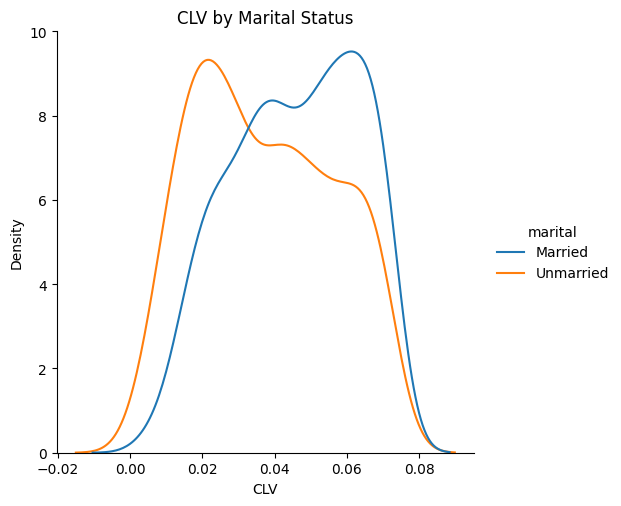

In [32]:
martial = sns.displot(data_unchanged, x = 'CLV', kind = 'kde', hue = 'marital')
martial.set(title='CLV by Marital Status')

A subtle distinction is noticeable between married and unmarried users. Married individuals appear to possess higher CLVs compared to unmarried counterparts, suggesting they are less inclined to take the risk of switching service providers. This interpretation aligns with the observed data, supported by the distinct peak positions for both groups, further reinforcing the observation.

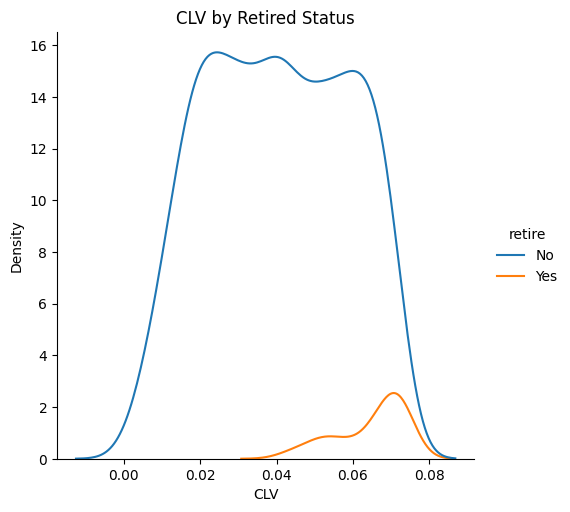

In [59]:
retiree = sns.displot(data_unchanged, x = 'CLV', kind = 'kde', hue = 'retire')
retiree.set(title='CLV by Retired Status')

With retired people making up only a small portion of the population, it is hard to interpret this result.

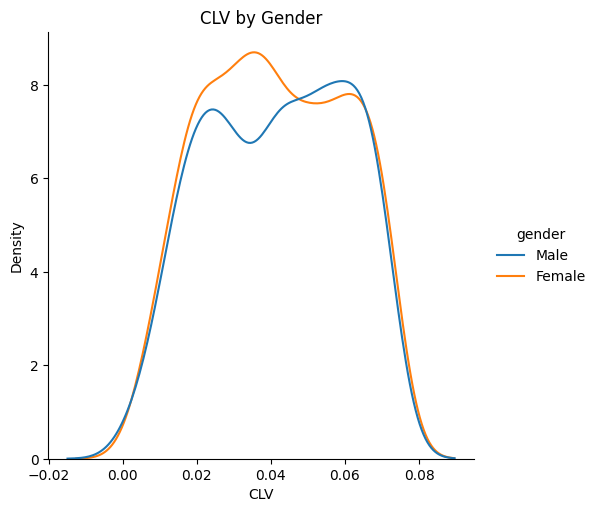

In [34]:
gender = sns.displot(data_unchanged, x = 'CLV', kind = 'kde', hue = 'gender')
gender.set(title='CLV by Gender')

Gender does not have significant impact as observed by this graph

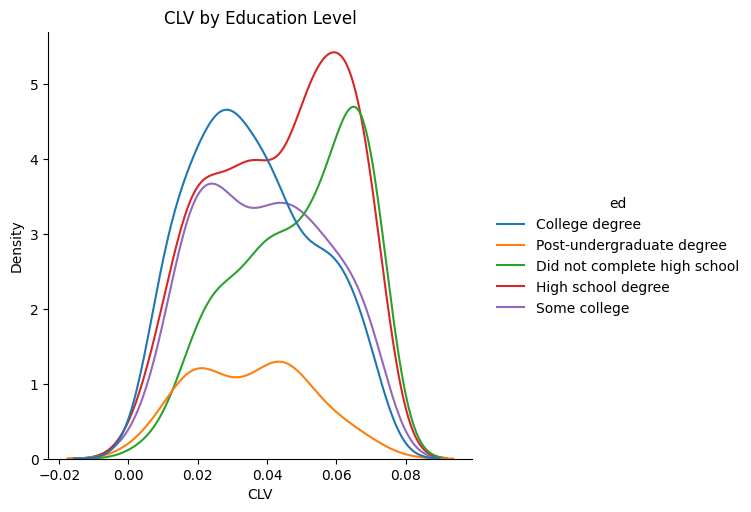

In [35]:
ed = sns.displot(data_unchanged, x = 'CLV', kind = 'kde', hue = 'ed')
ed.set(title="CLV by Education Level")

This plot reveals an intriguing correlation among different education levels and Customer Lifetime Values (CLVs). Firstly, individuals with post-undergraduate degrees exhibit relatively sparse density across CLVs. Next, customers with some college education display the second-lowest density, indicating comparatively lower CLV values with a peak skewed towards the lower end. Conversely, customers without high school diplomas demonstrate significantly higher CLVs, with density concentrated on higher CLV ranges. Following them are customers with college degrees, whose distribution resembles that of individuals with some college education, albeit with a higher peak and density. Lastly, high school graduates form the largest group, with a notable peak and higher CLV experiences compared to other education levels.

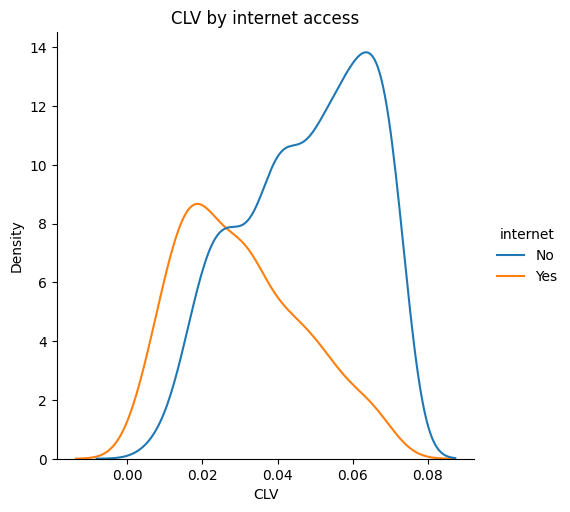

In [38]:
internet = sns.displot(data_unchanged, x = 'CLV', kind = 'kde', hue = 'internet')
internet.set(title="CLV by internet access")

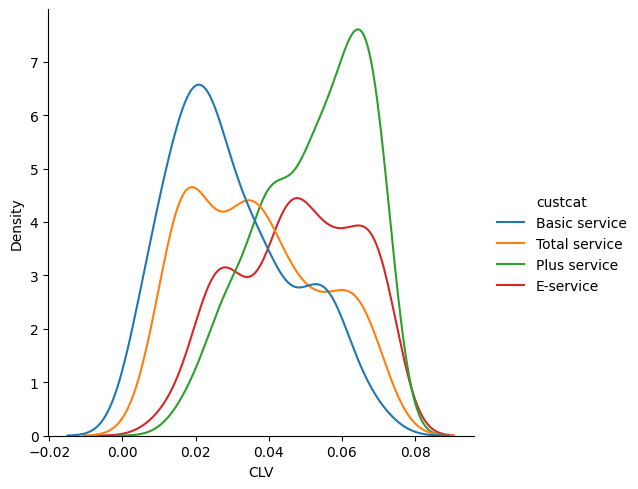

In [45]:
custcat = sns.displot(data_unchanged, x = 'CLV', kind = 'kde', hue = 'custcat')
internet.set(title="CLV by Customer Category")

***What else would you suggest for retention?***

1. Segmentation for Tailored Strategies: Divide the customer base into distinct segments based on demographics, behavior, and preferences. This segmentation enables the customization of retention tactics to address the unique needs of each segment effectively.

2. Customized Communication and Offers: Personalize communication and offerings according to individual customer preferences. Leverage advanced analytics to gain insights into customer behavior, allowing for the delivery of targeted and meaningful content that resonates with each customer.

3. Incentivize Loyalty with Rewards: Implement loyalty programs designed to incentivize repeat business and foster long-term customer loyalty. These programs can include various rewards such as discounts, exclusive access, or point-based systems, encouraging customers to remain engaged and loyal to the brand.